In [306]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.stats as stats
import pandas as pd
from matplotlib.lines import Line2D

# Consumer Resource Model
In this week's assigment we look at a generalization of MacArthur's Consoumer Resource Model to the case of $m$ species and $p$ resources.
In teh biotic case the model reads:

$$
\begin{cases}
\dot{n}_{\sigma} \quad = \quad n_{\sigma} \cdot \left ( \sum\limits_{i = 1}^{p} v_i \alpha_{\sigma i} r_i(c_i)  - \delta_{\sigma} \right ) \quad \quad \quad \sigma = 1, ..., m

\\
\\

\dot{c}_i \quad = \quad s_i -  \sum\limits_{\sigma = 1}^{m} n_{\sigma} \alpha_{\sigma i} r_i(c_i) \quad \quad \quad i = 1, ..., p

\end{cases}
$$

$s_i$ is the supply rate, i.e. the rate of growth of the $i_{th}$ resource. $\alpha_{\sigma i}$ is the metabolic energy of species σ devoted to eat resource $i$, also called the metabolic strategy of $\sigma$. In particular, only if  $\alpha_{\sigma i} > 0$ species $\sigma$ can consume resource $i$.
$r_i(c_i)$ is instead the Monod function,

$$

r_i(c_i) = \dfrac{c_i}{c_i + K_i}

$$

With a resource specific constant $K_i$

$v_i < 1$ is the efficiency of the conversion of resource $i$ into biomass of species $\sigma$.

\\
\\

We study the case of biotic resource, i.e. the supply rate is $s(c_i) = \omega c_i \cdot (1 - c_i K_i) $ and we have a linear resource concentration $r(c_i) = c_i$.

In [288]:
m = 3
p = 2

initial_n = list(np.abs(stats.norm.rvs(loc = 5, scale = 1, size=m)))
initial_c = list(np.abs(stats.norm.rvs(loc = 5, scale = 1, size=p)))

a = np.random.normal(0, 1, size = (m, p))
a[a < 0] = 0

v = np.random.normal(0, 1, size = p)
v = np.abs(v)


delta = np.random.normal(0, 1, size = m)
delta = np.abs(delta)

omega = 1

k = np.random.uniform(0.5, 1.5, size = p)

def system(y, t, m, p, a, v, delta, omega, k):
    return_list = []
    n_vec = np.array(y[:m])
    c_vec = np.array(y[m:])
    for i in range(m):
        n = y[i]
        dn_dt = n * ( np.sum(v * a[i, :] * c_vec) - delta[i])
        return_list.append(dn_dt)

    for j in range(p):
        
        c = y[m + j]
        s_i = omega * c * (1 - c/k[j])
        dc_dt = s_i - (np.sum(n_vec * a[:, j] * c))
        return_list.append(dc_dt)
    
    return return_list

    


# time_domain
t = np.linspace(0, 200, 200)

# initial conditions
y0 = initial_n + initial_c

solution = odeint(system, y0, t, args=(m, p, a, v, delta, omega, k), full_output=1)

# Saving solution
#pd.DataFrame(solution[0], columns = ['n1', 'n2', 'c1', 'c2', 'c3']).to_csv('../../data/week_5/CRM32.csv')

In [312]:
first_solution = pd.read_csv('../../data/week_5/CRM23.csv', index_col = 0)
second_solution = pd.read_csv('../../data/week_5/CRM32.csv', index_col = 0)

t1 = np.linspace(0, 100, 100)

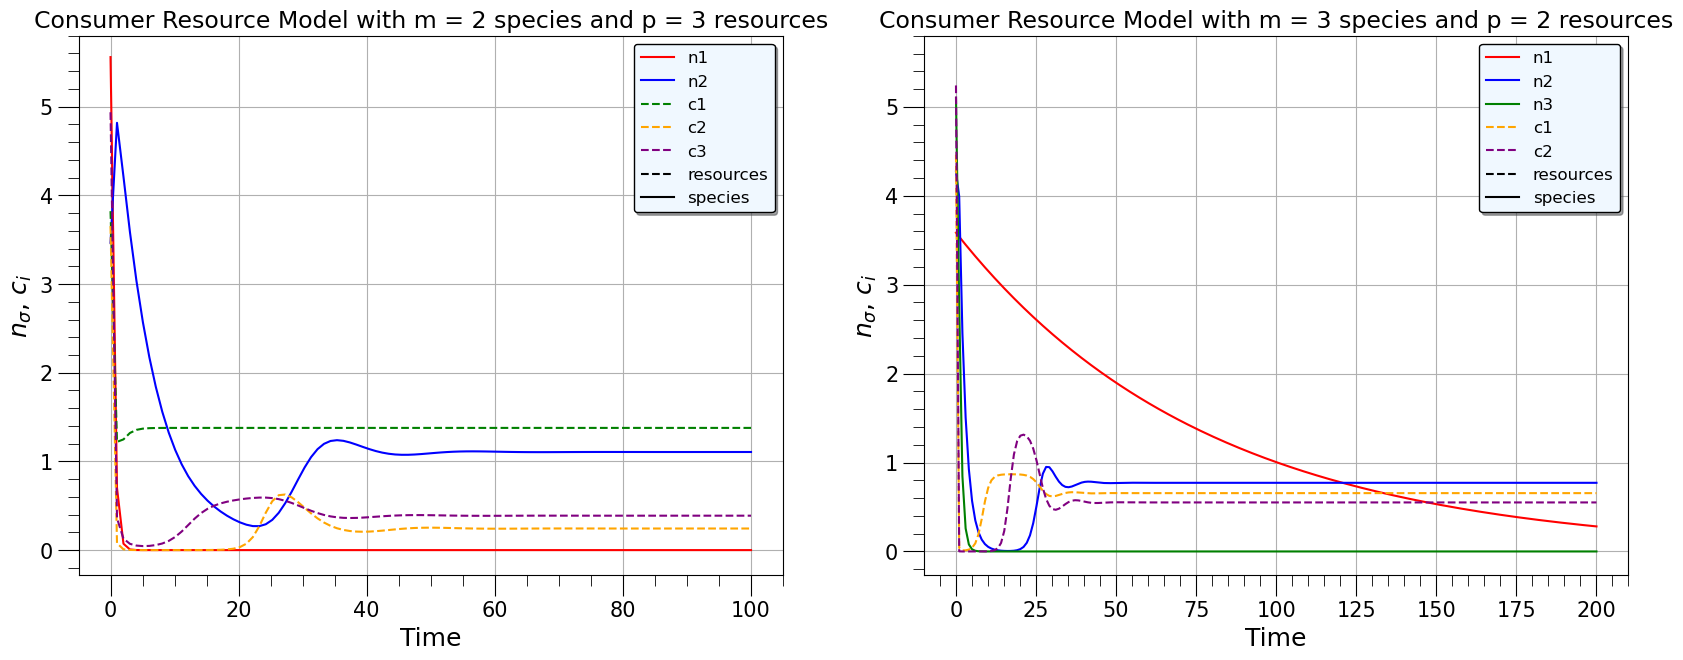

In [339]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
ax1, ax2 = ax
ax1.set_title('Consumer Resource Model with m = 2 species and p = 3 resources', fontsize = 17)
ax2.set_title('Consumer Resource Model with m = 3 species and p = 2 resources', fontsize = 17)
#ax1.set_xlim(right = 100)
#ax2.set_xlim(right = 200)
params1 = {'1': ['red', '-'], '2':['blue', '-'], '3': ['green', '--'], '4': ['orange', '--'], '5':['purple', '--']}
params2 = {'1': ['red', '-'], '2':['blue', '-'], '3': ['green', '-'], '4': ['orange', '--'], '5':['purple', '--']}
for i in range(len(first_solution.columns)):
    ax1.plot(t1, first_solution.iloc[:, i], label = first_solution.columns[i], color = params1[str(i+1)][0], linestyle = params1[str(i+1)][1], zorder = 3)
    ax2.plot(t, second_solution.iloc[:, i], label = second_solution.columns[i], color = params2[str(i+1)][0], linestyle = params2[str(i+1)][1], zorder = 3)
    #ax2.plot(t, second_solution.iloc[:, i], label = 'n' + str(i + 1))


#custom_lines = [Line2D([0], [0], color=params[str(i)][0], lw=4, linestyle = params[str(i)][1]) for i in range(1, 6)]
for ax_ in ax:
    ax_.plot(10, 1, linestyle = '--', color = 'black', label = 'resources')
    ax_.plot(10, 1, linestyle = '-', color = 'black', label = 'species')
    ax_.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True, fontsize = 12)
    ax_.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True, fontsize = 12)
    ax_.set_ylim(top = 5.8)
    ax_.grid(zorder = 1)
    ax_.minorticks_on()
    ax_.tick_params(axis='both', which='major', labelsize=15, length=15)
    ax_.tick_params(axis='both', which='minor', labelsize=15, length=8)
    ax_.set_xlabel('Time', fontsize = 18)
    ax_.set_ylabel('$n_{\sigma}$, $c_i$', fontsize = 18)